<a href="https://colab.research.google.com/github/Sarumathi-G23/Long-Short-term-memory-RNN/blob/main/Handwritten_Digit_Recognition_on_MNIST_Using_Bidirectional_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:

print("Train shape:", x_train.shape)

Train shape: (60000, 28, 28)


In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
model = models.Sequential([

    # First BiLSTM layer
    layers.Bidirectional(
        layers.LSTM(128, return_sequences=True),
        input_shape=(28, 28)
    ),
    layers.Dropout(0.3),

    # Second BiLSTM layer
    layers.Bidirectional(
        layers.LSTM(64)
    ),
    layers.Dropout(0.3),

    # Dense layers
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')   # 10 digits
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 28, 256)        │       160,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 334,026 (1.27 MB)

 Trainable params: 334,026 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 139s 177ms/step - accuracy: 0.6939 - loss: 0.8996 - val_accuracy: 0.9492 - val_loss: 0.1687
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 132s 176ms/step - accuracy: 0.9546 - loss: 0.1536 - val_accuracy: 0.9706 - val_loss: 0.1018
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 133s 178ms/step - accuracy: 0.9702 - loss: 0.1005 - val_accuracy: 0.9727 - val_loss: 0.0894
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 142s 178ms/step - accuracy: 0.9774 - loss: 0.0772 - val_accuracy: 0.9765 - val_loss: 0.0815
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 132s 176ms/step - accuracy: 0.9803 - loss: 0.0652 - val_accuracy: 0.9809 - val_loss: 0.0671
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 142s 175ms/step - accuracy: 0.9827 - loss: 0.0565 - val_accuracy: 0.9818 - val_loss: 0.0648
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 143s 176ms/step - accuracy: 0.9865 - loss: 0.0465 - val_accuracy: 0.9820 - val_loss: 0.0640
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 133s 177ms/step - accuracy: 0.9868 -

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.9749 - loss: 0.0906

Test Accuracy: 0.9819999933242798


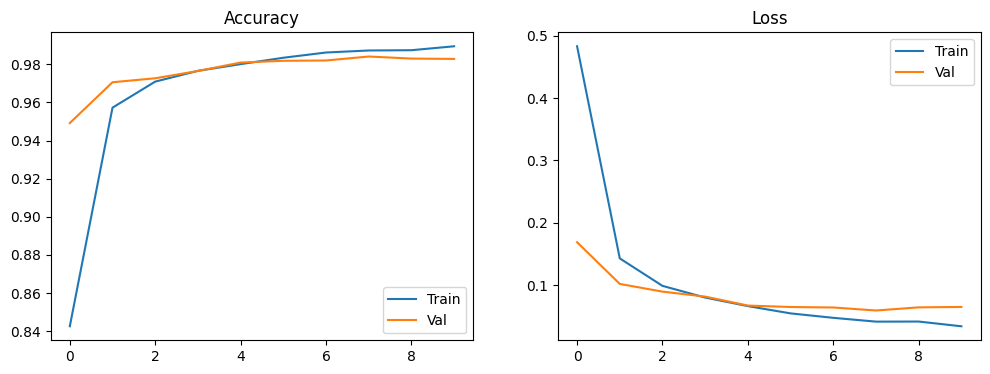

In [9]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title("Loss")
plt.legend()

plt.show()